Omid Ghorbani : 982019024  ----------------------------------------------------------------    Simulation Midterm 

# Dr. Hamidreza Izadbakhsh 

# changing the interval and service distribution from exp to uniform 

this cause to lots of people have to stay in the queu because the rate of service in lower than interval 

also the visualization part has changed and we should see somthing that close to a uniform distribution

In [35]:
#first we defined the function we need for simulation 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class simulation():            # OOP method ( object oriented  programming )
    
    def __init__(self):          
        
        self.number_in_system = 0                #number_in_system
        self.clock = 0                           #timing variable
        
        self.t_arrival = self.generate_interarrival()     #timing that people come into the queu
        self.t_depart  = float('inf')                     # bacause we have no departion when we start the simulation 
        
        self.num_arrivals = 0
        self.num_departs = 0
        self.total_wait = 0      
    
    def advance_time(self):
        
        t_event = min(self.t_arrival , self.t_depart)
        
        self.total_wait += self.number_in_system * (t_event - self.clock)        #number in the queu * the time that pased
                                                                         #exp --> two * (30 s pasted) ==> 1 minute total waiting 
        
        self.clock = t_event
        
        if self.t_arrival <= self.t_depart:
            
            self.handle_arival_event()
        else:
            self.handle_departs_event()
    
    def handle_arival_event(self):
        
        self.number_in_system +=1         #vorud rokh dade _ ye nafar umad tu saf
        self.num_arrivals +=1             #ye nafar umad tu saf (vorud)
        
        if self.number_in_system <=1:   #age kesi tu saf nist --> zaman khoruj hmun zamane service
            self.t_depart = self.clock + self.generate_service()
        
        else:
            self.t_arrival = self.clock + self.generate_interarrival()
    
    
    def handle_departs_event(self):           
              
        
        if self.number_in_system > 0:
            
            self.number_in_system -= 1       #yenafar az saf kharej shod (tedad kol kam mishe)
            self.num_departs +=1 
            self.t_depart = self.clock + self.generate_service()   
        else:
            self.t_depart = float('inf')         # because we have no departion 
        
    
    def generate_interarrival(self):           #nerkh_vorud with mean of 1/8 min -----> 7.5 second
        return np.random.uniform(0.1 , 0.3)
    
    def generate_service(self):               #nerkh_khedmat with mean of 1/10 min ----> 6 second
        return np.random.uniform(0.2 , 0.35)

np.random.seed(0)       #because we dont want that our random number change evry time we run the program

s = simulation()        #S is a object that represent a simulation class 

generate_interarrival_l = []
                                #l represent a list that we created for all of our variable to put values on it
generate_service_l = []

num_arrivals_l = []

num_in_system_l = []

num_departs_l = []

t_arrival_l  = []

t_depart_l = []

total_wait_l = []

number_of_operation = int(input('number of operation : ')) 
print()
for i in range(number_of_operation):
    
    s.advance_time()
    
    generate_interarrival_l.append(s.generate_interarrival())
    
    generate_service_l.append(s.generate_service())
    
    num_arrivals_l.append(s.num_arrivals)
    
    num_in_system_l.append(s.number_in_system)
    
    num_departs_l.append(s.num_departs)
    
    t_arrival_l.append(s.t_arrival)
    
    t_depart_l.append(s.t_depart)
    
    total_wait_l.append(s.total_wait)

print(f'total number of arrival is : {s.num_arrivals}')
print()
print(f'total number of departs is : {s.num_departs}')  
print()
print(f'total number of people in the system is   : {s.number_in_system}') 
print()
print(f'total wait in system : {s.total_wait}' , 'minutes')
print()
print(f'waiting per operation in average : {s.total_wait / number_of_operation}' , 'minutes')
print()
print(f'average number in system : {sum(num_in_system_l) / number_of_operation}' , 'people')


#now i want to get a out put in a file and this file will be saved in your computer 
#(in the same direction that you saved your python code)

print()
print()

#now we put our information in  a DataFrame

out_put = pd.DataFrame({'number_in_system' : num_in_system_l,
              'total_arrival' :  num_arrivals_l ,
              'total_depart':  num_departs_l , 
              'generate_interval': generate_interarrival_l , 
              'generate_service(zaman khedmat)': generate_service_l ,
              'time_arrival' : t_arrival_l , 
              'time_depart'  : t_depart_l , 
                'total_wait_time': total_wait_l 
                } )
    
#get a out put
#print(out_put)



data = out_put.to_csv('output.csv')
    
#this csv file will save in your pc ( in the same direction you saved the python file )
#saving the file ( nokte ----> dar hmun jayi ke khode file python save shode be format (csv))



# if you want to re run the program the csv file must be closed.
# if you dont do the you will get an error
# notice  : PermissionError: [Errno 13] Permission denied: 'output.csv'






number of operation : 10000

total number of arrival is : 5794

total number of departs is : 4206

total number of people in the system is   : 1588

total wait in system : 920673.0186770612 minutes

waiting per operation in average : 92.06730186770612 minutes

average number in system : 798.0158 people




# visualization part 

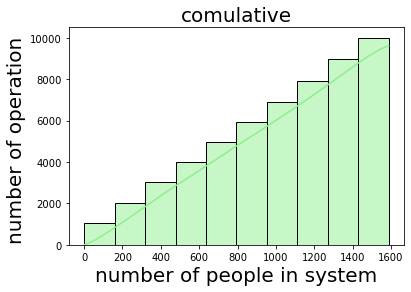

In [36]:
#visulalization using matplotlib and seaborn 

import seaborn as sns
sns.histplot(num_in_system_l , color = 'lightgreen' , bins = 10 ,cumulative = True , kde = True)

plt.xlabel('number of people in system' , fontsize = 20)
plt.ylabel('number of operation ' , fontsize = 20)
plt.title('comulative' , fontsize = 20)
plt.show()


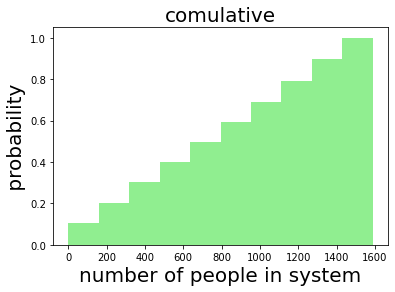

In [37]:
plt.hist(num_in_system_l , color = 'lightgreen' , bins = 10 ,cumulative = True , density = True)

plt.xlabel('number of people in system' , fontsize = 20)
plt.ylabel(' probability ' , fontsize = 20)
plt.title('comulative' , fontsize = 20)
plt.show()


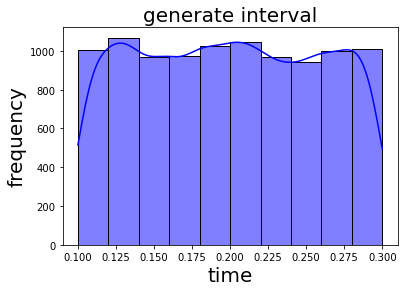

In [38]:
sns.histplot( generate_interarrival_l , color = 'blue' , bins = 10  ,cumulative = False , kde = True)

plt.xlabel('time' , fontsize = 20)
plt.ylabel('frequency' , fontsize = 20)
plt.title('generate interval' , fontsize = 20)
plt.show()

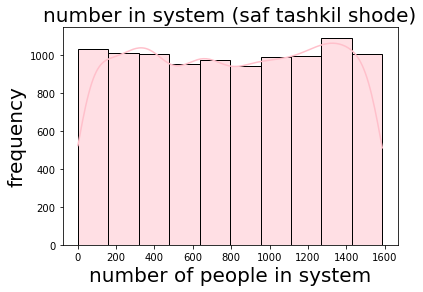

In [39]:
sns.histplot( num_in_system_l , color = 'pink' , bins = 10 ,cumulative = False , kde = True )

plt.xlabel('number of people in system' , fontsize = 20)
plt.ylabel('frequency' , fontsize = 20)
plt.title('number in system (saf tashkil shode)' , fontsize = 20)
plt.show()

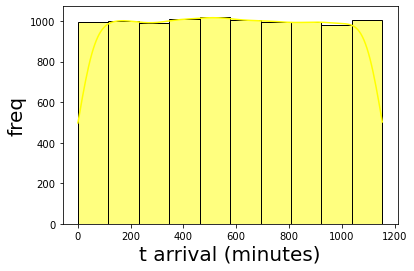

In [40]:
sns.histplot( t_arrival_l , color = 'yellow' , bins = 10 ,cumulative = False , kde = True )

plt.xlabel('t arrival (minutes)' , fontsize = 20)
plt.ylabel('freq' , fontsize = 20)
plt.title('' , fontsize = 20)
plt.show()

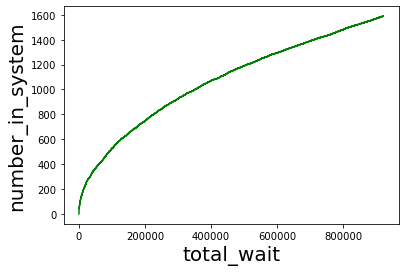

In [41]:
sns.lineplot( x= total_wait_l , y = num_in_system_l ,color = 'green' , )

plt.xlabel('total_wait' , fontsize = 20)                     #it shows that if the number of people are in the queu increased
                                                            # the total wait would tend to increase too and
                                                            #there is a correlation between thease two variables
plt.ylabel('number_in_system' , fontsize = 20)
plt.title('' , fontsize = 20)
plt.show()

# Thanks